In [1]:
import pylab
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.io import fits
from astropy import wcs
from astropy.table import Table

## Read tables

In [3]:
SWIRE_cat=Table.read('./data/output/dmu26_XID+MIPS_ELAIS-N2_SWIRE_cat.fits')

In [4]:
SWIRE_cat[0:10]

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J163346.992+394243.420,248.445799537607,39.712061083265695,14.360089,28.563936,5.267528,-0.00041493773,5.2701807e-06,nan,801.0,0.0
HELP_J163354.120+394351.612,248.475501874607,39.7310033402657,25.430574,40.34344,11.7319975,0.0006374985,5.1512056e-06,nan,2000.0,0.0
HELP_J163352.386+394403.444,248.468276218376,39.7342898946138,125.43618,140.12993,109.88434,0.0006374985,5.1512056e-06,1.0011711,2000.0,0.0
HELP_J163352.492+394246.993,248.468716218376,39.7130536946138,262.72702,276.2755,247.86346,0.0006374985,5.1512056e-06,0.9981907,2000.0,0.0
HELP_J163352.915+394257.838,248.470479318376,39.7160660946138,71.052124,83.45411,59.446747,0.0006374985,5.1512056e-06,nan,2000.0,0.0
HELP_J163350.599+394301.108,248.460827683607,39.71697437126569,117.74637,131.73906,103.897964,0.0006374985,5.1512056e-06,0.9987709,2000.0,0.0
HELP_J163353.384+394244.961,248.472431358607,39.712489031265704,3.9729717,9.538257,1.1805742,0.0006374985,5.1512056e-06,nan,2000.0,0.0
HELP_J163353.119+394332.116,248.47133095060698,39.7255878742657,141.08069,156.3033,126.02507,0.0006374985,5.1512056e-06,nan,2000.0,0.0


## Look at Symmetry of PDFs to determine depth level of catalogue

4.9961205


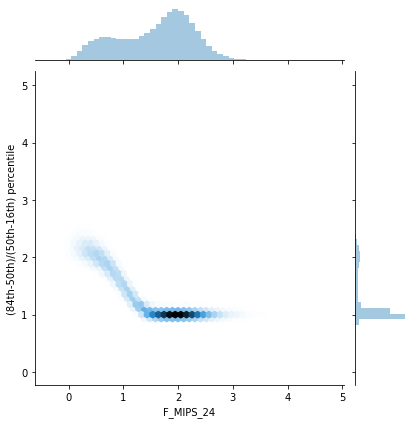

In [6]:
import seaborn as sns
skew=(SWIRE_cat['FErr_MIPS_24_u']-SWIRE_cat['F_MIPS_24'])/(SWIRE_cat['F_MIPS_24']-SWIRE_cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(SWIRE_cat['F_MIPS_24'][use]),y=skew[use], kind='hex')
print(np.max(skew[use]))

g.savefig('../../data/figs/sk_MIPS_ELAIS-N2.pdf', bbox='tight')
g.savefig('../../data/figs/sk_MIPS_ELAIS-N2.png', bbox='tight')

Both seem to have flux pdfs that become Gaussian at ~20$\mathrm{\mu Jy}$ 

## Add flag to catalogue

In [11]:
from astropy.table import Column
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_mips_24'))


In [12]:
ind_SWIRE=(SWIRE_cat['Pval_res_24']>0.5) | (SWIRE_cat['F_MIPS_24'] < 20.0)

In [8]:
SWIRE_cat['flag_mips_24'][ind_SWIRE]=True


In [10]:
SWIRE_cat.write('./data/dmu26_XID+MIPS_ELAIS-N2_SWIRE_cat_20181108.fits', format='fits',overwrite=True)